In [4]:
%matplotlib notebook


import numpy as np
import matplotlib.pyplot as plt
import h5py
# import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
import pyvista as pv
pv.set_jupyter_backend('pythreejs')



In [7]:
data = h5py.File('/Users/ericachiu/Documents/MEng/siren-sampling/uniformity/temp_0.0001_jacobian_bounded_mh_result.hdf5')
v, f, sample_density, triangle_areas = data['v'], data['f'], data['sample_density'], data['triangle_area']
v, f, sample_density, triangle_areas = np.array(v), np.array(f), np.array(sample_density), np.array(triangle_areas)
points = np.array(data['samples'])
f = (f + 1)

In [14]:
import pyvista
import numpy as np
mesh = pyvista.Cube()
mesh.clear_data()
mesh.cell_data['my_array'] = np.random.random(mesh.n_cells)
mesh.plot()

Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(color='#fefefe', inten…

In [8]:
def decorate_tri_faces(faces):
    return np.hstack([np.expand_dims(np.full([faces.shape[0]], 3), 1), faces])
mesh_pd = pv.PolyData(v, decorate_tri_faces(f))
mesh_pd.plot()

Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(color='#fefefe', inten…

<IPython.core.display.Javascript object>


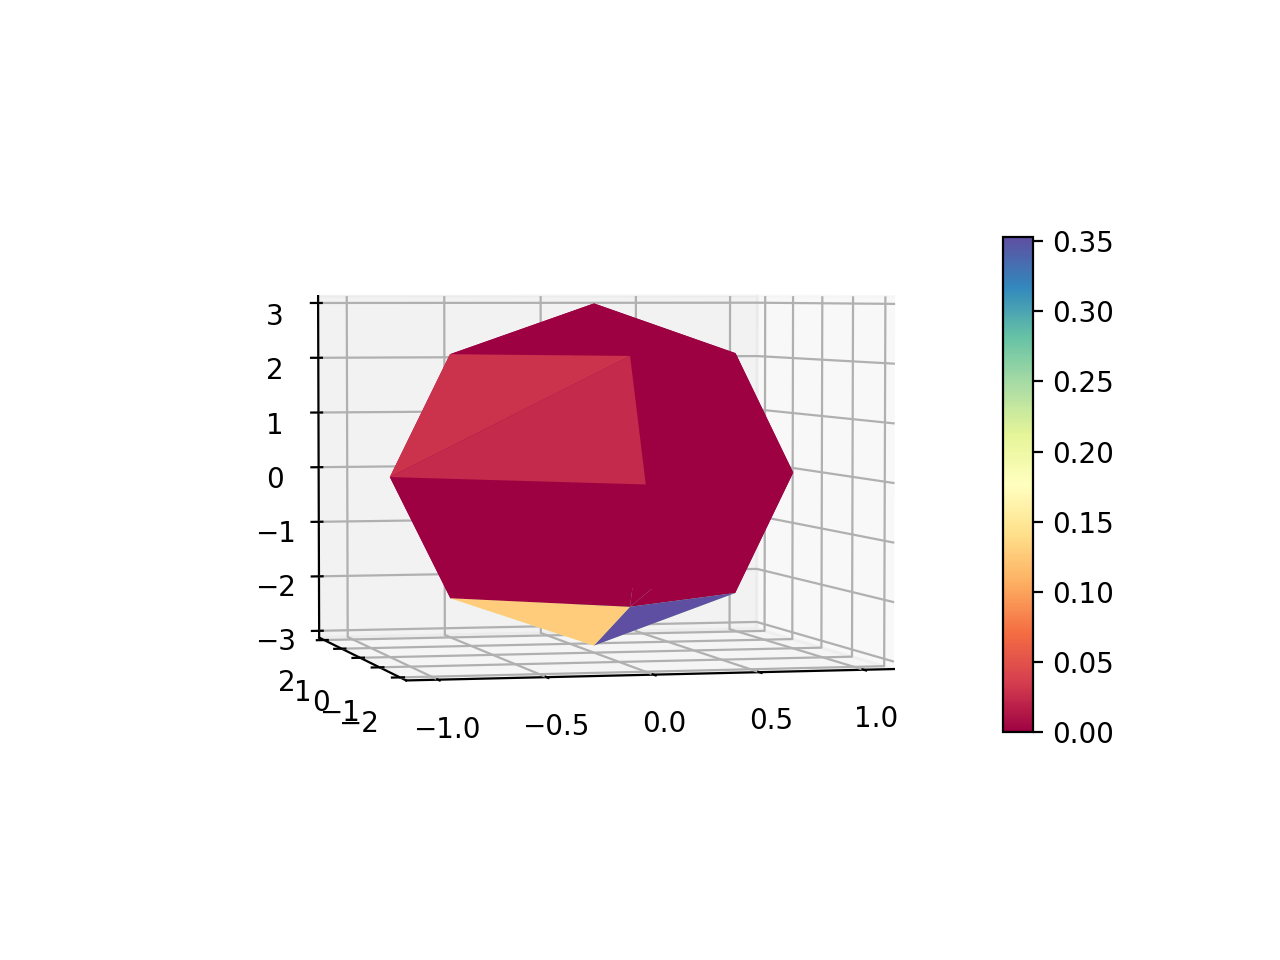

[0.     0.     0.     0.     0.     0.     0.     0.     0.002  0.
 0.0295 0.0242 0.     0.     0.     0.0004 0.2058 0.     0.1281 0.
 0.3527 0.     0.2573 0.    ]
[[ 4  5  8]
 [ 4  5  1]
 [ 1  6  5]
 [ 1  6  2]
 [ 2  7  6]
 [ 2  7  3]
 [ 3  8  7]
 [ 3  8  4]
 [ 8  9 12]
 [ 8  9  5]
 [ 5 10  9]
 [ 5 10  6]
 [ 6 11 10]
 [ 6 11  7]
 [ 7 12 11]
 [ 7 12  8]
 [ 0  4  1]
 [13 12  9]
 [ 0  1  2]
 [13  9 10]
 [ 0  2  3]
 [13 10 11]
 [ 0  3  4]
 [13 11 12]]


In [5]:
from matplotlib.cm import ScalarMappable, get_cmap
from matplotlib.colors import Normalize

def map_colors(p3dc, values, cmap='viridis'):
    norm = Normalize()
    colors = get_cmap(cmap)(norm(values))

    # set the face colors of the Poly3DCollection
    p3dc.set_fc(colors)

    # if the caller wants a colorbar, they need this
    return ScalarMappable(cmap=cmap, norm=norm)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x,y,z = v.T


result = ax.plot_trisurf(x,y,z, triangles=f)

mappable = map_colors(result, sample_density, 'Spectral')
plt.colorbar(mappable, shrink=0.67, aspect=16.7)
plt.show()

print(sample_density)
print(f)

<IPython.core.display.Javascript object>


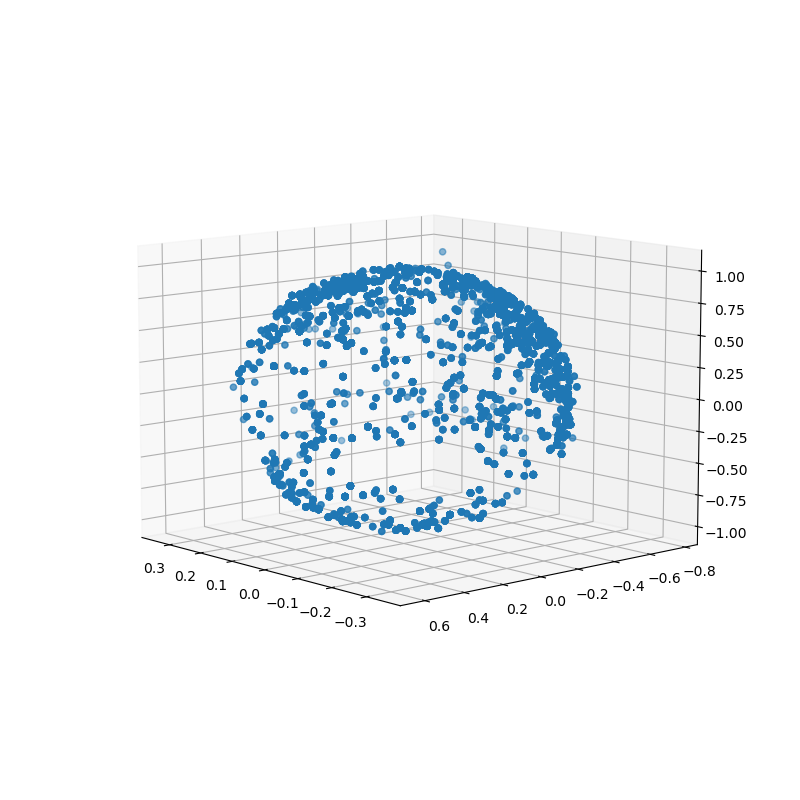

In [48]:
fig = plt.figure(figsize=(8,8))

x,y,z = points.T

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)
plt.show()

In [42]:
x,y,z = v.T
i,j,k = f.T
fig = go.Figure(data=[go.Mesh3d(x=x, y=y, z=z)])
fig.show()

In [22]:
v

array([[ 0.0000000e+00,  0.0000000e+00, -3.0000000e+00],
       [-7.0710677e-01, -1.7319121e-16, -2.1213202e+00],
       [ 4.3297803e-17, -1.4142135e+00, -2.1213202e+00],
       [ 7.0710677e-01,  0.0000000e+00, -2.1213202e+00],
       [ 4.3297803e-17,  1.4142135e+00, -2.1213202e+00],
       [-1.0000000e+00, -2.4492937e-16,  0.0000000e+00],
       [ 6.1232343e-17, -2.0000000e+00,  0.0000000e+00],
       [ 1.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 6.1232343e-17,  2.0000000e+00,  0.0000000e+00],
       [-7.0710677e-01, -1.7319121e-16,  2.1213202e+00],
       [ 4.3297803e-17, -1.4142135e+00,  2.1213202e+00],
       [ 7.0710677e-01,  0.0000000e+00,  2.1213202e+00],
       [ 4.3297803e-17,  1.4142135e+00,  2.1213202e+00],
       [ 0.0000000e+00,  0.0000000e+00,  3.0000000e+00]], dtype=float32)

In [19]:
points.shape

(10000, 3)

In [20]:
points

array([[ 0.30717917, -0.76998611,  0.90056573],
       [ 0.30717917, -0.76998611,  0.90056573],
       [ 0.25344129, -0.70325798,  0.81995417],
       ...,
       [-0.27829332, -0.1176304 ,  0.49843297],
       [-0.27829332, -0.1176304 ,  0.49843297],
       [-0.27829332, -0.1176304 ,  0.49843297]])

In [26]:
(f+14)%14


array([[ 3,  4,  7],
       [ 3,  4,  0],
       [ 0,  5,  4],
       [ 0,  5,  1],
       [ 1,  6,  5],
       [ 1,  6,  2],
       [ 2,  7,  6],
       [ 2,  7,  3],
       [ 7,  8, 11],
       [ 7,  8,  4],
       [ 4,  9,  8],
       [ 4,  9,  5],
       [ 5, 10,  9],
       [ 5, 10,  6],
       [ 6, 11, 10],
       [ 6, 11,  7],
       [13,  3,  0],
       [12, 11,  8],
       [13,  0,  1],
       [12,  8,  9],
       [13,  1,  2],
       [12,  9, 10],
       [13,  2,  3],
       [12, 10, 11]])